In [1]:
%pip install google-play-scraper textblob seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
from pathlib import Path
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15,10)

In [5]:
from google_play_scraper import Sort, reviews_all
app_id = 'com.aci.viuit'
languages = ['en', 'id', 'es', 'my']

all_reviews_data = []

for lang_code in languages:
    result = reviews_all(
        app_id,
        lang=lang_code,
        country='id',
        sort=Sort.MOST_RELEVANT,
    )
    all_reviews_data.extend(result)
len(all_reviews_data)

1670

In [6]:
import pandas as pd

df = pd.DataFrame(all_reviews_data)
df.to_csv('../data/raw/aci_dataset_raw.csv')
df = df[['content', 'score']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1670 non-null   object
 1   score    1670 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.2+ KB


In [ ]:
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk import word_tokenize
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stemmed_all_tokens = []
for text in df['content']:
    stemmed_text = stemmer.stem(text)
    stemmed_tokens = word_tokenize(stemmed_text)
    stemmed_all_tokens.extend(stemmed_tokens)
    
def stemming(text):
    stemmed_all_tokens = []
    stemmed_text = stemmer.stem(text)
    stemmed_tokens = word_tokenize(stemmed_text)
    stemmed_all_tokens.extend(stemmed_tokens)
    return stemmed_all_tokens

In [38]:
Counter(stemmed_all_tokens).most_common(100)

[('aplikasi', 643),
 ('di', 478),
 ('dan', 474),
 ('bisa', 367),
 ('ada', 302),
 ('nya', 296),
 ('driver', 277),
 ('aci', 272),
 ('ini', 259),
 ('saya', 255),
 ('yang', 249),
 ('yg', 219),
 ('murah', 213),
 ('sangat', 210),
 ('ga', 205),
 ('banyak', 195),
 ('tidak', 193),
 ('gak', 172),
 ('juga', 172),
 ('makan', 166),
 ('untuk', 159),
 ('baik', 145),
 ('banget', 145),
 ('promo', 144),
 ('mau', 140),
 ('pesan', 135),
 ('aja', 130),
 ('moga', 130),
 ('apk', 129),
 ('harga', 128),
 ('guna', 126),
 ('sama', 125),
 ('lebih', 124),
 ('pakai', 122),
 ('indonesia', 122),
 ('buat', 121),
 ('resto', 121),
 ('bagus', 118),
 ('jadi', 114),
 ('order', 113),
 ('layan', 113),
 ('tapi', 111),
 ('bantu', 109),
 ('bayar', 107),
 ('ya', 107),
 ('lagi', 106),
 ('dari', 106),
 ('lain', 105),
 ('sekali', 102),
 ('dengan', 100),
 ('ramah', 96),
 ('sudah', 95),
 ('terus', 93),
 ('mudah', 92),
 ('baru', 92),
 ('ke', 91),
 ('dapat', 83),
 ('gk', 82),
 ('belum', 82),
 ('drivernya', 81),
 ('apa', 81),
 ('lama', 

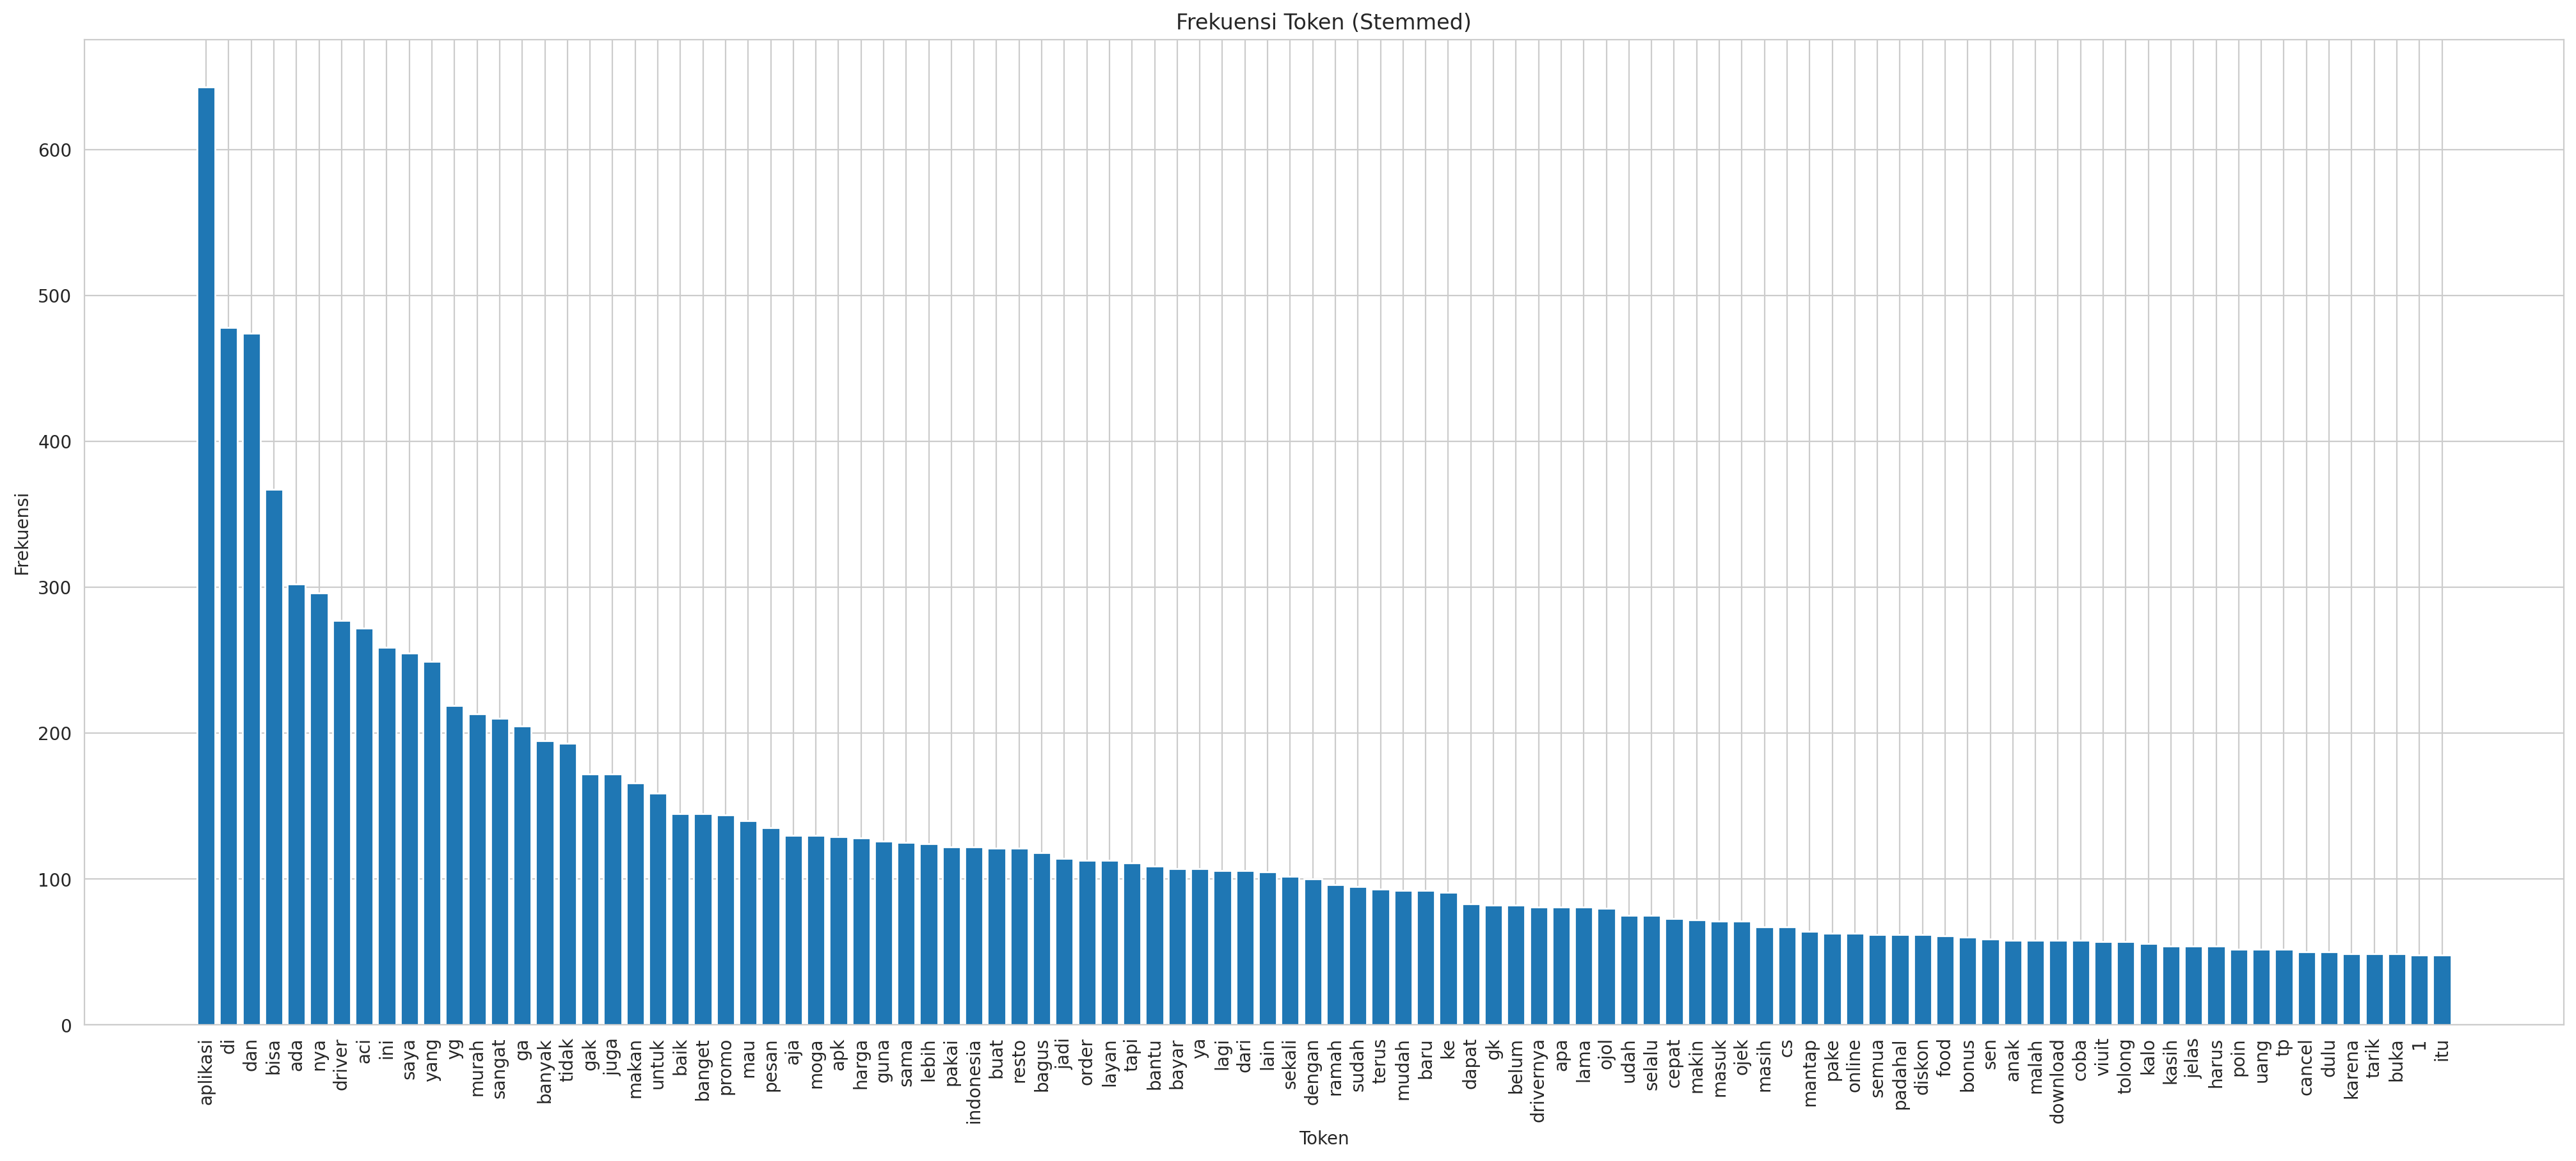

In [ ]:
import matplotlib.pyplot as plt

most_common = Counter(stemmed_all_tokens).most_common(100)

words, counts = zip(*most_common)

plt.figure(figsize=(25, 10))
plt.bar(words, counts)
plt.xlabel("Token")
plt.ylabel("Frekuensi")
plt.title("Frekuensi Token (Stemmed)")
plt.xticks(rotation=90)
plt.show()

In [19]:
df['stemmed_text'] = df['content'].apply(stemming)

In [20]:
df.head()

,content,score,stemmed_text
0,You lied and said in your app's points page th...,1,"[you, lied, and, said, in, your, app, s, point..."
1,One star rating for this app. Main reason: thi...,1,"[one, star, rating, for, this, app, main, reas..."
2,the app is weird with something like tiktok vi...,2,"[the, app, is, weird, with, something, like, t..."
3,"di hp xiaomi 12t aplikasi nya nge bug, force c...",1,"[di, hp, xiaomi, 12t, aplikasi, nya, nge, bug,..."
4,Kenapa 100.000 gratisnya gak bisa buat top up?...,1,"[kenapa, 100, 000, gratis, gak, bisa, buat, to..."


In [23]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def indo_stopword_removal(text_list):
    stopword_factory = StopWordRemoverFactory()
    stopwords = stopword_factory.get_stop_words()
    filtered = [word for word in text_list if word not in stopwords]
    return filtered

In [ ]:
df['stemmed_stopwords_text'] = df['stemmed_text'].apply(indo_stopword_removal)
df['stemmed_stopwords_text'].head()

0    [you, lied, and, said, in, your, app, points, ...
1    [one, star, rating, for, this, app, main, reas...
2    [the, app, is, weird, with, something, like, t...
3    [hp, xiaomi, 12t, aplikasi, nge, bug, force, c...
4    [100, 000, gratis, gak, top, up, 1, 1, 1, 1, 1...
Name: stemmed_stopwords_text, dtype: object

In [33]:
df.iloc[4, 3]

['100', '000', 'gratis', 'gak', 'top', 'up', '1', '1', '1', '1', '1', '1']